In [66]:
from make_dataset import *

In [ ]:
import classyRF

In [64]:
import importlib
importlib.reload(make_dataset)
#importlib.reload(classyRF)

<module 'make_dataset' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\HasMassGap\\AllEvents\\make_dataset.py'>

In [15]:
createJointDataset()

Adding  68951  samples in the mass gap to training
Adding  29550  samples in the mass gap to testing
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 138337, 1: 70613}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 22246, 1: 70613, 2: 116091}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 22246, 1: 70613, 2: 75226, 3: 40865}
Two categories:  0 - No Mass Gap, 1 - Mass Gap
{0: 59289, 1: 30260}
Three categories: 0 - a mass<3,  1 - Mass Gap,  2 - a mass>5
{0: 9453, 1: 30260, 2: 49836}
Four categories: 0 - m1&m2<3 (BNS),  1 - Mass Gap,  2 - m1>5 & m2<3 (NSBH) ,  3 - m1&m2>5 (BBH)
{0: 9453, 1: 30260, 2: 32257, 3: 17579}


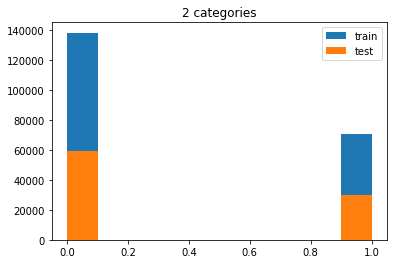

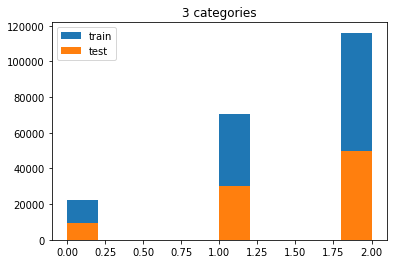

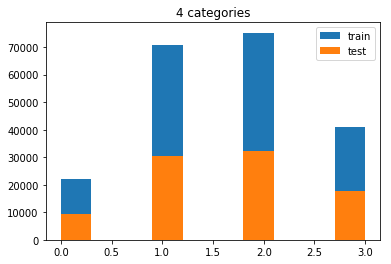

In [23]:
plt.title("2 categories")
plt.hist(readfile(pathHere+'train_2cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_2cat.csv')[:,-1], label='test')
plt.legend()
plt.show()

plt.title("3 categories")
plt.hist(readfile(pathHere+'train_3cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_3cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


plt.title("4 categories")
plt.hist(readfile(pathHere+'train_4cat.csv')[:,-1], label='train')
plt.hist(readfile(pathHere+'test_4cat.csv')[:,-1], label='test')
plt.legend()
plt.show()


All approaches are unbalanced

## Other types of score
As the events in different categories are not balanced, the score can be misleading. We therefore use other metrics:

**Sensitivity**: tp/(tp+fn). Measures how much the model says YES when it is YES, even if we say YES to some events that are NO.

**Precision**: tp/(tp+fp). How much we can trust the model when it says YES. Never say YES when it is NO.

**F1 score**: a combination of the previous two, which balance them. The best case scenario is value = 1.

These will be taken with threshold=0.5 (they will be used as first check to see if the method worths more time)

# 2 categories

50 trees, max_depth=15
Score on testing:  0.9501055288166256
******Confusion matrix******


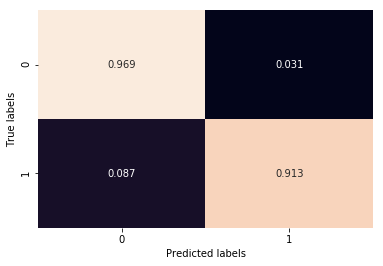

Sensitivity  0.9134831460674157
Precision  0.9372711243727113
F1 score  0.9252242602758067
---------------------------
50 trees, max_depth=None
Score on testing:  0.958391495159075
******Confusion matrix******


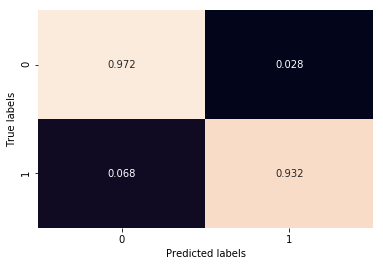

Sensitivity  0.9319894249834766
Precision  0.9441580180783394
F1 score  0.9380342591052719
---------------------------
100 trees, max_depth=15
Score on testing:  0.9516465845514747
******Confusion matrix******


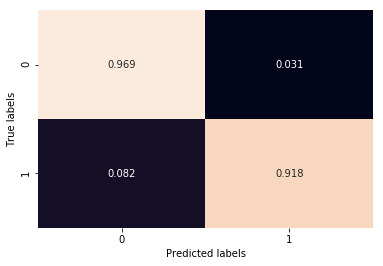

Sensitivity  0.9184401850627891
Precision  0.9372091454778445
F1 score  0.9277297459692226
---------------------------
100 trees, max_depth=None
Score on testing:  0.9586706719226346
******Confusion matrix******


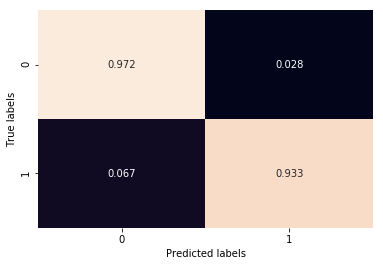

Sensitivity  0.9332452081956377
Precision  0.9438187226362755
F1 score  0.9385021850750236


<Figure size 432x288 with 0 Axes>

In [24]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: More trees without limiting the maximum depth. 50 trees without limiting depth should be ok in terms of memory of the model and accuracy

# 3 categories

50 trees, max_depth=15
Score on testing:  0.9549520374320205
******Confusion matrix******


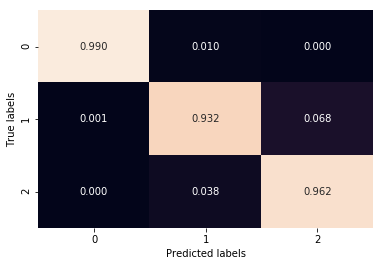

Sensitivity  0.9319233311302049
Precision  0.9345794392523364
F1 score  0.9332494953172056
---------------------------
50 trees, max_depth=None
Score on testing:  0.9577438050676166
******Confusion matrix******


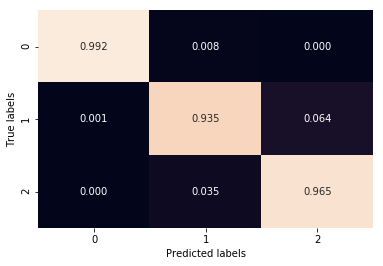

Sensitivity  0.934699272967614
Precision  0.9399175860693871
F1 score  0.9373011664899258
---------------------------
100 trees, max_depth=15
Score on testing:  0.955577393382394
******Confusion matrix******


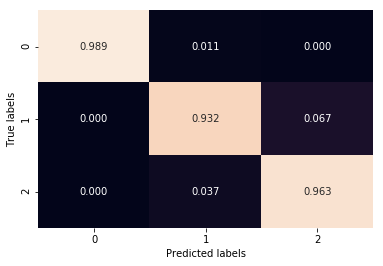

Sensitivity  0.9324520819563781
Precision  0.9358540630182421
F1 score  0.9341499751696738
---------------------------
100 trees, max_depth=None
Score on testing:  0.9582128220303968
******Confusion matrix******


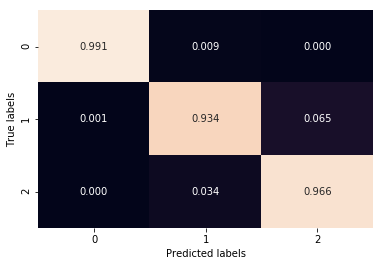

Sensitivity  0.9344679444811632
Precision  0.9414369423358636
F1 score  0.937939498474194


<Figure size 432x288 with 0 Axes>

In [25]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: Same as before, 50 trees without limiting depth should be fine

# 4 categories

50 trees, max_depth=15
Score on testing:  0.947827446425979
******Confusion matrix******


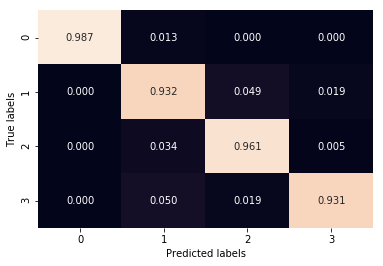

Sensitivity  0.9318241903502974
Precision  0.9301335972290945
F1 score  0.9309781262897234
---------------------------
50 trees, max_depth=None
Score on testing:  0.9489999888329295
******Confusion matrix******


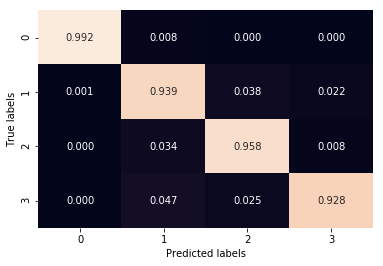

Sensitivity  0.9386979510905487
Precision  0.9337299891522304
F1 score  0.9362073795751553
---------------------------
100 trees, max_depth=15
Score on testing:  0.9479167829903181
******Confusion matrix******


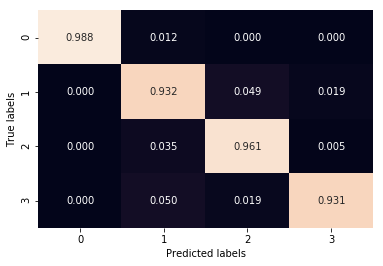

Sensitivity  0.9317250495703899
Precision  0.9303722280887011
F1 score  0.9310481474143054
---------------------------
100 trees, max_depth=None
Score on testing:  0.9497258484181844
******Confusion matrix******


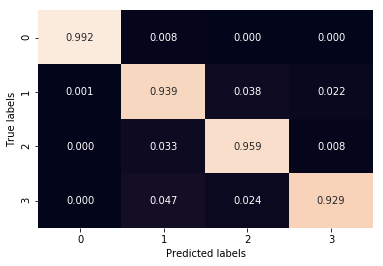

Sensitivity  0.9391936549900859
Precision  0.9353607161664034
F1 score  0.9372732669348987


<Figure size 432x288 with 0 Axes>

In [26]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF.Nfeatures = 5
RF.data_train=RF.data_train_all[:,2:7]
RF.data_test=RF.data_test_all[:,2:7]
print("50 trees, max_depth=15")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("50 trees, max_depth=None")
RF.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=15")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=15)
RF.print_metrics(pathHere)
otherscores(RF)
print("---------------------------")
print("100 trees, max_depth=None")
RF.train(trees=100, criterion='gini', max_features='sqrt', max_depth=None)
RF.print_metrics(pathHere)
otherscores(RF)

Best: same as before.

## Plot de data (mass gap recovered values)

In [27]:
data = readfile(filename=pathHere + 'train_2cat.csv')
indexes=np.where(data[:,-1]==1)[0]

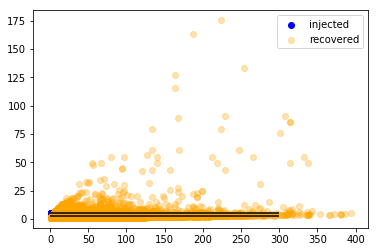

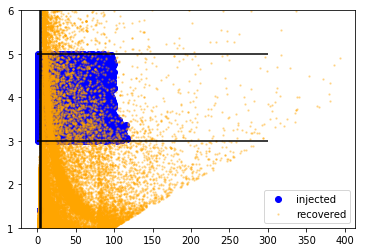

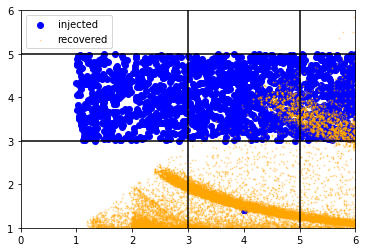

In [61]:
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=2, alpha=0.3)
plt.legend()
plt.show()

plt.ylim(1,6)
plt.xlim(0,6)
plt.hlines(3,0,300)
plt.hlines(5,0,300)
plt.vlines(3,0,6)
plt.vlines(5,0,6)
plt.scatter(data[indexes,0],data[indexes,1], label='injected',c='blue')
plt.scatter(data[indexes,2],data[indexes,3], label='recovered',c='orange',s=1, alpha=0.3)
plt.legend()

# Comparison of 50 trees, max_depth=None, for 2, 3 and 4 categories

2 cat
Score on testing:  0.958391495159075
******Confusion matrix******


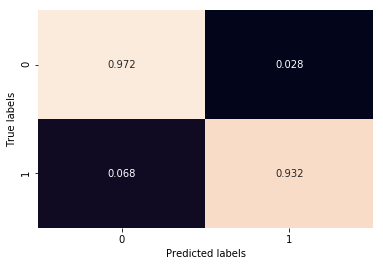

Sensitivity  0.9319894249834766
Precision  0.9441580180783394
F1 score  0.9380342591052719
3 cat
Score on testing:  0.9577438050676166
******Confusion matrix******


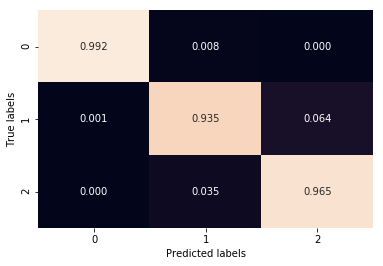

Sensitivity  0.934699272967614
Precision  0.9399175860693871
F1 score  0.9373011664899258
4 cat
Score on testing:  0.9489999888329295
******Confusion matrix******


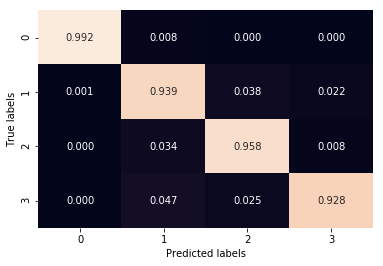

Sensitivity  0.9386979510905487
Precision  0.9337299891522304
F1 score  0.9362073795751553


<Figure size 432x288 with 0 Axes>

In [62]:
RF2 = classyRF.ClassificationRF()
RF2.load_train_dataset(pathHere, fname_x='train_2cat.csv')
RF2.load_test_dataset(pathHere, fname_x='test_2cat.csv')
RF2.Nfeatures = 5
RF2.data_train=RF2.data_train_all[:,2:7]
RF2.data_test=RF2.data_test_all[:,2:7]
print("2 cat")
RF2.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF2.print_metrics(pathHere)
otherscores(RF2)

RF3 = classyRF.ClassificationRF()
RF3.load_train_dataset(pathHere, fname_x='train_3cat.csv')
RF3.load_test_dataset(pathHere, fname_x='test_3cat.csv')
RF3.Nfeatures = 5
RF3.data_train=RF3.data_train_all[:,2:7]
RF3.data_test=RF3.data_test_all[:,2:7]
print("3 cat")
RF3.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF3.print_metrics(pathHere)
otherscores(RF3)

RF4 = classyRF.ClassificationRF()
RF4.load_train_dataset(pathHere, fname_x='train_4cat.csv')
RF4.load_test_dataset(pathHere, fname_x='test_4cat.csv')
RF4.Nfeatures = 5
RF4.data_train=RF4.data_train_all[:,2:7]
RF4.data_test=RF4.data_test_all[:,2:7]
print("4 cat")
RF4.train(trees=50, criterion='gini', max_features='sqrt', max_depth=None)
RF4.print_metrics(pathHere)
otherscores(RF4)

We see a bit more accuracy on being in mass gap using 4 categories. Now we do the ROC curves and histograms for these 3 forests

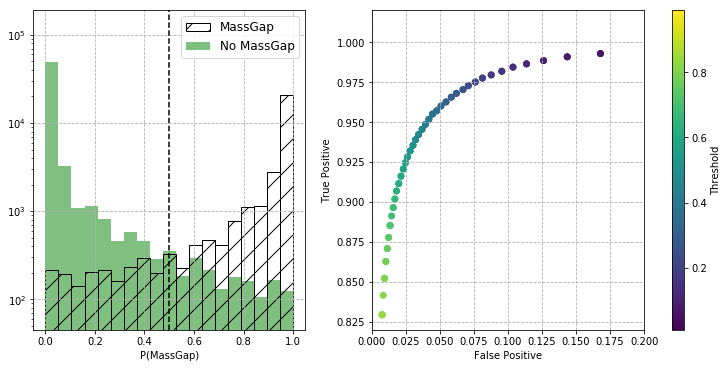

In [67]:
hist_ROC_MassGap(RF2,'')

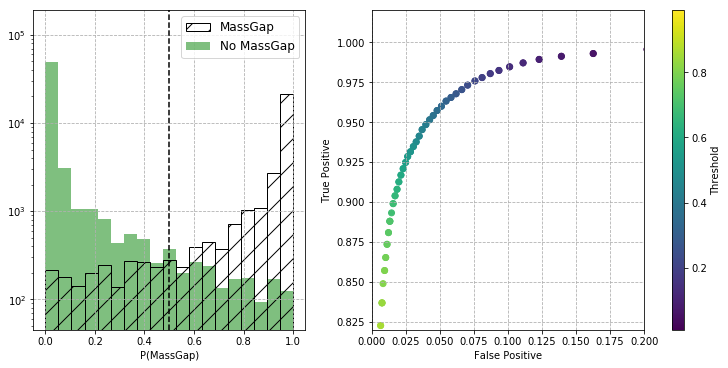

In [68]:
hist_ROC_MassGap(RF3,'')

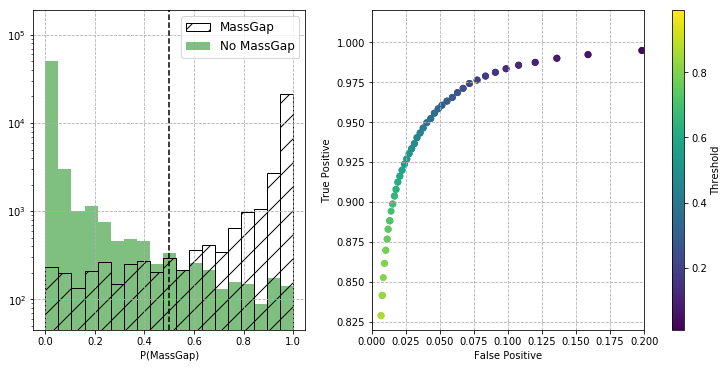

In [69]:
hist_ROC_MassGap(RF4,'')

2 and 3 categories perform similarly. 4 categories seem to perform better